In [1]:
import Dataloader
import model_gabor as mg
import performancetest as pt

In [2]:

train_imgs, train_probs, train_types, test_imgs, test_probs, test_types = \
        Dataloader.load_and_preprocess_dataset(out_types="All", wire_removal="Crop", augment="None", aug_types=["Flip"], crop_pix=20, shuffle=True, balance_probs=2)
        #Dataloader.load_and_preprocess_dataset(out_types="Poly", wire_removal="Crop", augment="All", aug_types=["Flip"], crop_pix=20, shuffle=True, balance_probs=2)

1508 295 106 715
----- Method:[reduce_dataset], ran in 0.0 Seconds,
1508 295 106 715
----- Method:[remove_cell_wires], ran in 4.214023113250732 Seconds,
----- Method:[split_t_t_data], ran in 0.8590257167816162 Seconds,
1131 221 80 535
377 74 26 180
----- Method:[shuffle_set], ran in 0.26607728004455566 Seconds,
----- Method:[balance_prob_nums], ran in 0.05082440376281738 Seconds,
160 160 80 160
377 74 26 180
----- Method:[load_and_preprocess_dataset], ran in 15.971414566040039 Seconds,


In [3]:
model = mg.initialize_model()

In [4]:
history = mg.train_model(model, train_imgs, train_probs, epochs=25, batch_size=1000)

Epoch 1/25
1/1 [==============================] - 86s 86s/step - loss: 1.3973 - accuracy: 0.1286 - val_loss: 40.2714 - val_accuracy: 0.0000e+00
Epoch 2/25
1/1 [==============================] - 64s 64s/step - loss: 12.6140 - accuracy: 0.3810 - val_loss: 31.4730 - val_accuracy: 0.0000e+00
Epoch 3/25
1/1 [==============================] - 66s 66s/step - loss: 12.4741 - accuracy: 0.3810 - val_loss: 13.6729 - val_accuracy: 0.0000e+00
Epoch 4/25
1/1 [==============================] - 62s 62s/step - loss: 7.0634 - accuracy: 0.3810 - val_loss: 4.7736 - val_accuracy: 0.0000e+00
Epoch 5/25
1/1 [==============================] - 49s 49s/step - loss: 3.0579 - accuracy: 0.3810 - val_loss: 2.7578 - val_accuracy: 0.5857
Epoch 6/25
1/1 [==============================] - 39s 39s/step - loss: 2.0658 - accuracy: 0.2024 - val_loss: 2.8273 - val_accuracy: 0.1857
Epoch 7/25
1/1 [==============================] - 39s 39s/step - loss: 1.8275 - accuracy: 0.3786 - val_loss: 3.0359 - val_accuracy: 0.0071
Epoch 

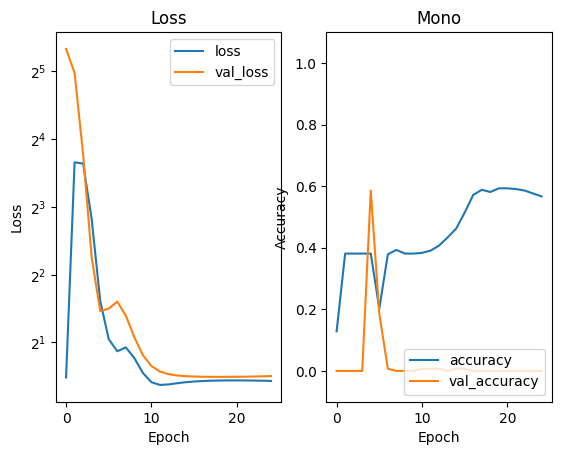

In [5]:
pt.plot_train_data(history)

In [6]:
y_true_m, y_true_p, y_predict_m, y_predict_p = pt.predict_results(mg.predict, model, test_imgs, test_probs, test_types)

13/13 [==============================] - 6s 488ms/step


Mono Results     |  Accuracy: 0.60967  Precision: 0.71303  Recall: 0.30965  F1: 0.28383
Poly Results     |  Accuracy: 0.61082  Precision: 0.56077  Recall: 0.29509  F1: 0.27304
Combined Results |  Accuracy: 0.61035  Precision: 0.60589  Recall: 0.30075  F1: 0.27732


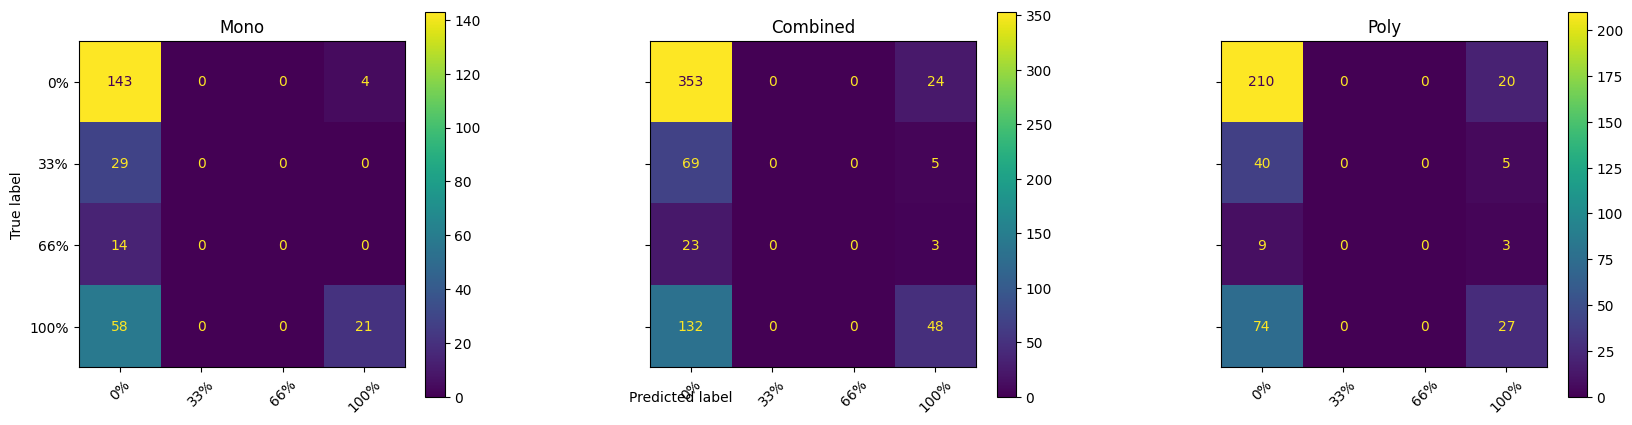

In [7]:
pt.display_results(y_true_m, y_true_p, y_predict_m, y_predict_p)